# WeatherPy
----

### Analysis
* Tempuratures decrease as the latituede gets father from zero. Tempuratures get much cooler in the northern hemisphere because it is winter. 
* There is not a noticable corrolation between latitude and cloudiness. 
* Weak coralation between wind speed and Latitude but the max speeds seem to pick up a little at +- 30 degrees.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from pprint import pprint
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame({"City": cities, "Country": countries})
cities_df.head()

,City,Country
0,avarua,ck
1,tasiilaq,gl
2,port lincoln,au
3,kapit,my
4,tawkar,sd


In [4]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
weather_data = []
count = 0
for index, row in cities_df.iterrows():
        count += 1
        city_q = row["City"]
        cnty = row["Country"]
        response = requests.get(query_url + city_q + "," + cnty).json()
        
        try:
            temp=response["main"]["temp_max"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_lon=response["coord"]["lon"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat, "Long": city_lon, "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{count} -- {city_q}")
        except:
            print (f"Weather for {city_q} not found.")
            count += 1
            continue

Processing record #1 -- avarua
Processing record #2 -- tasiilaq
Processing record #3 -- port lincoln
Processing record #4 -- kapit
Weather for tawkar not found.
Processing record #7 -- evensk
Processing record #8 -- okhotsk
Processing record #9 -- albany
Processing record #10 -- poya
Processing record #11 -- severo-kurilsk
Weather for samusu not found.
Processing record #14 -- tiarei
Processing record #15 -- anzio
Processing record #16 -- cape town
Processing record #17 -- muravlenko
Processing record #18 -- kabinda
Processing record #19 -- skjervoy
Processing record #20 -- mianyang
Processing record #21 -- divnomorskoye
Processing record #22 -- muriwai beach
Weather for amderma not found.
Processing record #25 -- ushuaia
Processing record #26 -- marsaxlokk
Processing record #27 -- tadine
Weather for doctor pedro p. pena not found.
Processing record #30 -- qaanaaq
Processing record #31 -- east london
Weather for barentsburg not found.
Processing record #34 -- cabedelo
Processing record

Processing record #274 -- kaitangata
Processing record #275 -- aloleng
Weather for abu samrah not found.
Processing record #278 -- buckeye
Weather for naenwa not found.
Processing record #281 -- batagay-alyta
Processing record #282 -- saint-pierre
Processing record #283 -- busayra
Processing record #284 -- luderitz
Processing record #285 -- boende
Processing record #286 -- tezu
Processing record #287 -- port-gentil
Weather for sentyabrskiy not found.
Processing record #290 -- pevek
Processing record #291 -- terrell
Processing record #292 -- kargasok
Processing record #293 -- santo amaro da imperatriz
Processing record #294 -- qaqortoq
Processing record #295 -- nieuw amsterdam
Weather for paradwip not found.
Processing record #298 -- cidreira
Weather for kazalinsk not found.
Processing record #301 -- klaksvik
Processing record #302 -- kruisfontein
Processing record #303 -- mogadishu
Processing record #304 -- sinop
Processing record #305 -- narsaq
Processing record #306 -- bulgan
Process

Processing record #540 -- ust-kuyga
Processing record #541 -- kampot
Processing record #542 -- abonnema
Processing record #543 -- izmit
Processing record #544 -- clovis
Processing record #545 -- coquimbo
Processing record #546 -- swellendam
Processing record #547 -- vostok
Processing record #548 -- quatre cocos
Processing record #549 -- nicoya
Processing record #550 -- zhaodong
Processing record #551 -- khash
Processing record #552 -- constitucion
Processing record #553 -- ambulu
Processing record #554 -- moa
Processing record #555 -- sobolevo
Processing record #556 -- xinzhou
Processing record #557 -- ajdabiya
Processing record #558 -- griffith
Processing record #559 -- moroni
Weather for lata not found.
Processing record #562 -- north bend
Processing record #563 -- tateyama
Processing record #564 -- tres palos
Processing record #565 -- west helena
Processing record #566 -- ambon
Processing record #567 -- cooma
Processing record #568 -- maniitsoq
Processing record #569 -- jaque
Weathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame(weather_data)
weather_data.count()

City                526
Cloudiness (%)      526
Country             526
Humidity (%)        526
Latitude            526
Long                526
Temperature (F)     526
Wind Speed (MPH)    526
dtype: int64

In [6]:
weather_data = weather_data[["City", "Country","Latitude", "Long", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_data.head()

,City,Country,Latitude,Long,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Avarua,CK,-21.21,-159.78,84.20,54,20,10.29
1,Tasiilaq,GL,65.61,-37.64,28.40,50,0,2.24
2,Port Lincoln,AU,-34.72,135.86,58.42,98,0,11.43
3,Kapit,MY,2.02,112.94,71.88,97,24,1.70
4,Evensk,RU,61.92,159.24,12.12,100,24,20.38


In [7]:
weather_data.to_csv("output_cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### World Map 

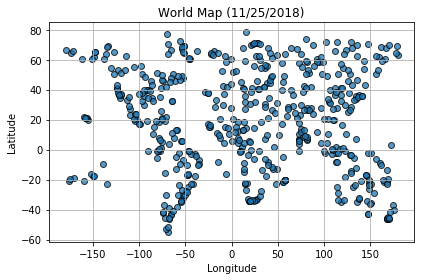

In [8]:
date = datetime.now()
date = date.strftime("%m/%d/%Y")

plt.scatter(weather_data["Long"], weather_data["Latitude"], alpha=.75, edgecolors="k")
plt.title(f"World Map ({date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True) 
plt.tight_layout()
plt.savefig("world_map.png")
plt.show()

#### Latitude vs. Temperature Plot

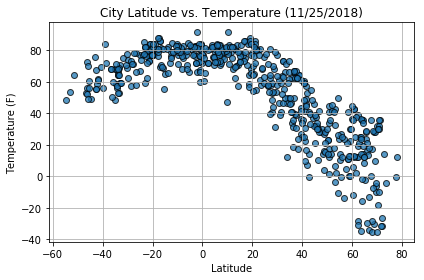

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

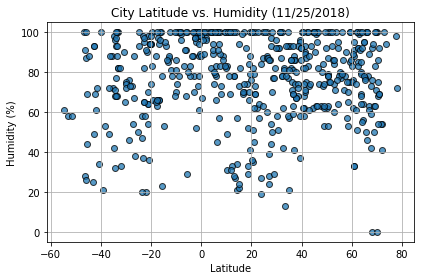

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

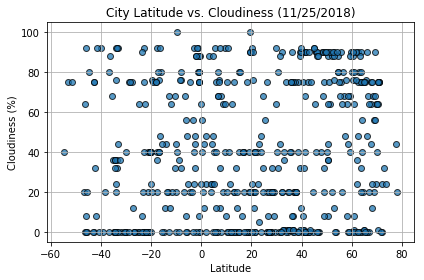

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("lat_vs_clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

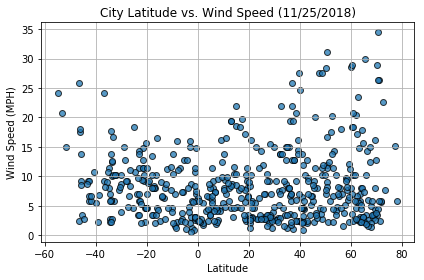

In [12]:

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("lat_vs_wind.png")
plt.show()